In [53]:
import pandas as pd
import pylab as pl
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [54]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [55]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download the file: {response.status_code}")

In [56]:
download(path, "FuelConsumption.csv")
path="FuelConsumption.csv"

In [57]:
df = pd.read_csv(path)

In [58]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [60]:
df.describe().round(3)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000,1067.000,1067.000,1067.000,1067.000,1067.000,1067.000
mean,2014.0,3.346,5.795,13.297,9.475,11.581,26.441,256.229
std,0.0,1.416,1.797,4.101,2.795,3.486,7.469,63.372
min,2014.0,1.000,3.000,4.600,4.900,4.700,11.000,108.000
25%,2014.0,2.000,4.000,10.250,7.500,9.000,21.000,207.000
50%,2014.0,3.400,6.000,12.600,8.800,10.900,26.000,251.000
75%,2014.0,4.300,8.000,15.550,10.850,13.350,31.000,294.000
max,2014.0,8.400,12.000,30.200,20.500,25.800,60.000,488.000


In [195]:
cdf = df[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


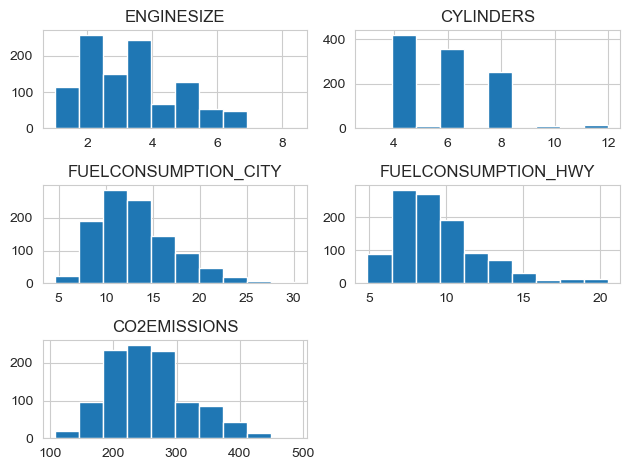

In [229]:
cols = ['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']
viz = cdf[cols]
viz.hist();
plt.tight_layout()

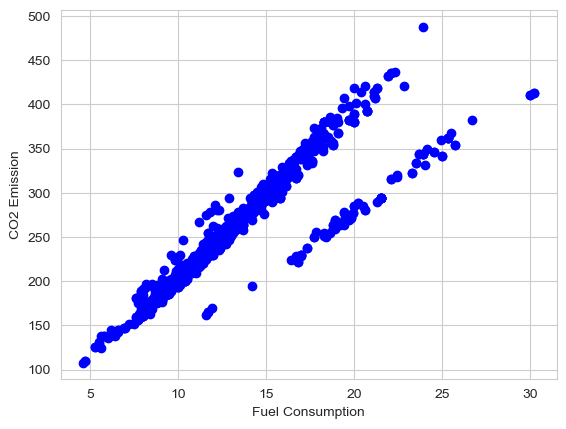

In [197]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue');
plt.xlabel("Fuel Consumption");
plt.ylabel("CO2 Emission");

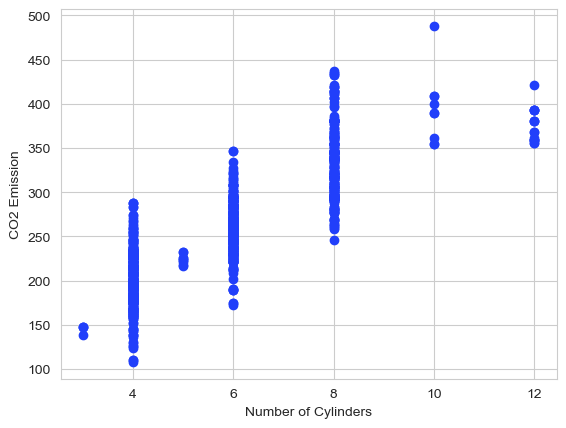

In [198]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="#213ffa");
plt.xlabel("Number of Cylinders");
plt.ylabel("CO2 Emission");

In [199]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [200]:
print("Training Set")
print(train.head())
print()
print("Testing Set")
print(test.head())

Training Set
   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0         2.0          4                   9.9                  6.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   
5         3.5          6                  11.9                  7.7   

   CO2EMISSIONS  
0           196  
2           136  
3           255  
4           244  
5           230  

Testing Set
    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1          2.4          4                  11.2                  7.7   
13         5.9         12                  18.0                 12.6   
30         3.0          6                  13.1                  8.8   
37         2.0          4                  11.8                  8.8   
43         3.0          6                  12.9                  8.4   

    CO

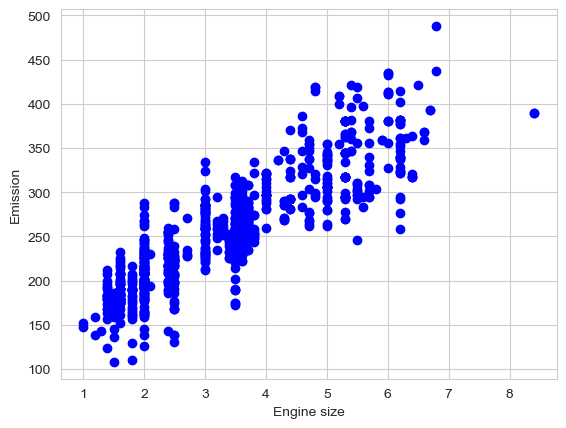

In [201]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission");

In [202]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [203]:
regr = linear_model.LinearRegression()

In [204]:
train_x = np.asanyarray(train[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [205]:
regr.fit(train_x, train_y)

LinearRegression()

In [206]:
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[ 7.8107392  10.37680231  5.35786734  4.20584311]]
Intercept:  [65.0146301]


In [207]:
# Predict the CO2 emissions using the model
test_x = np.asanyarray(test[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predictions = regr.predict(test_x)

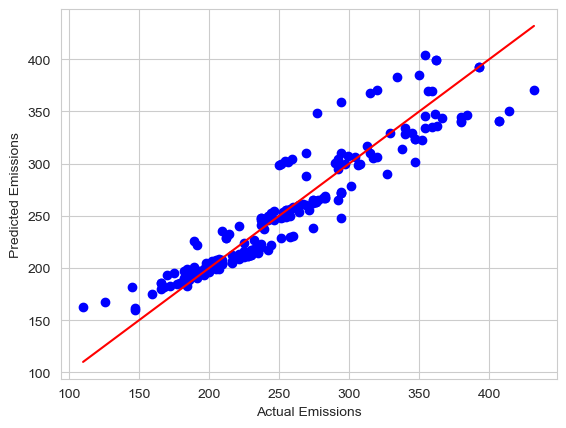

In [208]:
plt.scatter(test.CO2EMISSIONS, predictions, color='blue')
plt.plot([test.CO2EMISSIONS.min(), test.CO2EMISSIONS.max()], [test.CO2EMISSIONS.min(), test.CO2EMISSIONS.max()], '-r')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions");

In [209]:
print("R2-sore: %.3f"% r2_score(test_y, predictions))

R2-sore: 0.876


In [210]:
print("Mean Squared Error (MSE) : %.2f" % np.mean((predictions - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))

Mean Squared Error (MSE) : 501.12
Variance score: 0.88


### We have successfully completed the Multiple Linear Regression on Fuel Consumption.